In [1]:
from basindata import BasinData
arvorezinha = BasinData("../data/arvorezinha_database.xlsx")

Now we will calculate and save in a file all the combinations possible for proportions contribuited by the sediment sources. The rotine `calculate_and_save_all_proportions()` will create two files, one for all cobinations possible for eath sample in data base, savis its indexes, and the corresponding proportions. The defoult method for calculate is the ordinary least square. Other methods can be choosed by `bd.set_solver_option(option)`. 

In [2]:
arvorezinha.calculate_and_save_all_proportions()

Calculating all proportions...
Done! Time processing: 1.8434374332427979
Total combinations: 38880 , shape of proportions: (38880, 3)
Folder to save output files is: '../output'.
Saving combinations indexes in: C9E9L20Y24_combs.txt
Saving proportions calculated in: C9E9L20Y24_props.txt
Time for save files: 0.11546468734741211


In [3]:
import plots

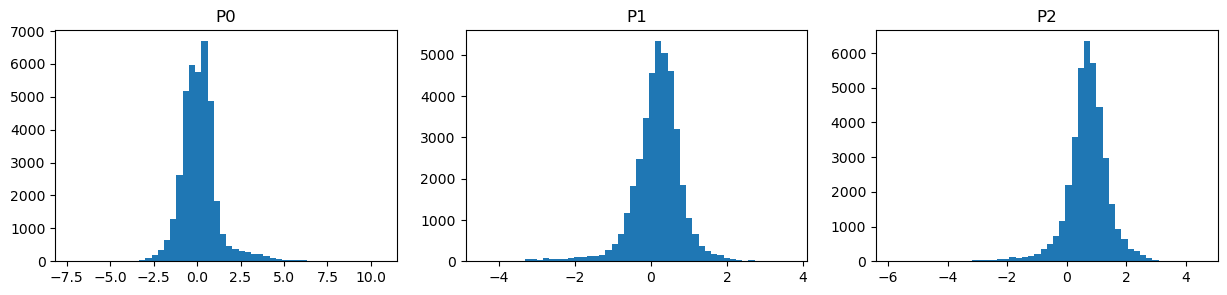

In [4]:
Ps = arvorezinha.props
plots.props_histo(Ps)

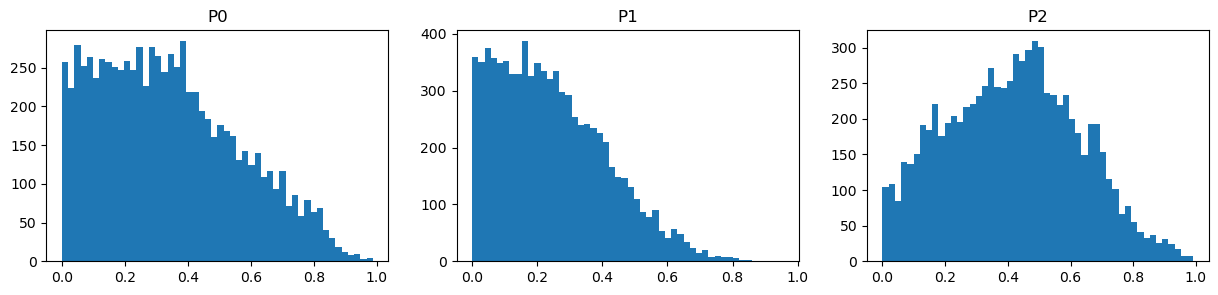

In [5]:
import clarkeminella as cm
plots.props_histo(cm.cm_feasebles(Ps))

In [6]:
import stats
import time
import matplotlib.pyplot as plt

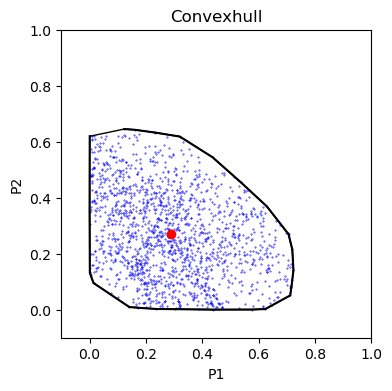

In [7]:
_,Ps = stats.randon_props_subsamples(arvorezinha, 'Y', 4)
P_feas = cm.cm_feasebles(Ps)
P_cr = stats.confidence_region(P_feas,space_dist='mahalanobis0')
ax = plots.draw_hull(P_cr, savefig = False)

In [8]:
for n in [2,4,8,12,16,20,24]:
    _,Ps = stats.randon_props_subsamples(arvorezinha, 'Y', n)
    P_feas = cm.cm_feasebles(Ps)
    P_cr = stats.confidence_region(P_feas,space_dist='mahalanobis0')
    ax = plots.draw_hull(P_cr, savefig = True,
                    title = 'Confidence region'+'Y'+str(n))

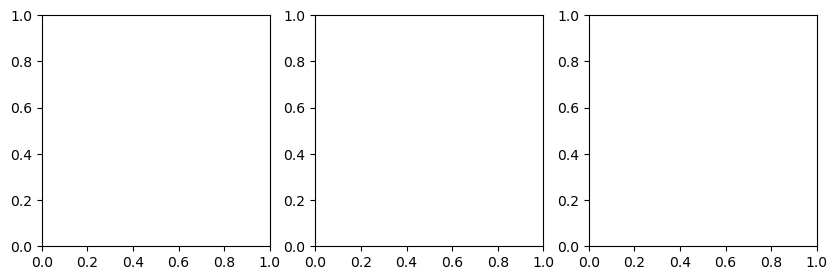

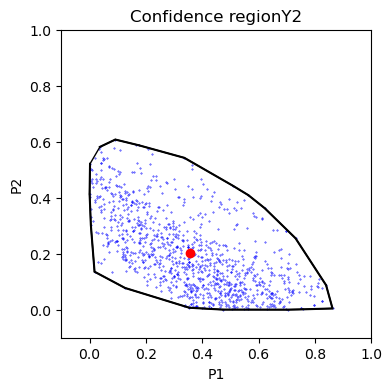

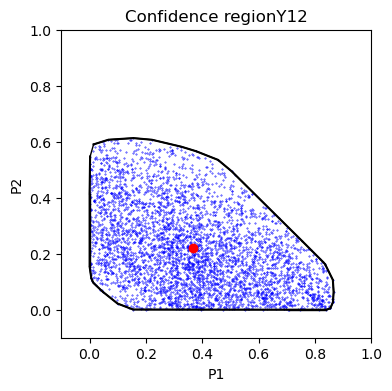

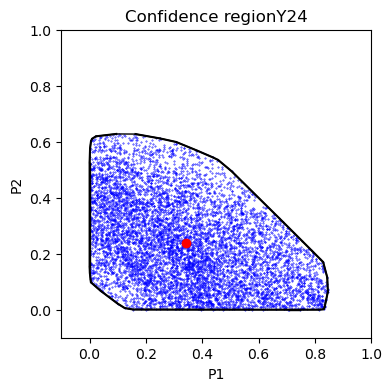

In [9]:
fig = plt.figure(figsize=(10,3))
i=1
for n in [2,12,24]:
    _,Ps = stats.randon_props_subsamples(arvorezinha, 'Y', n)
    P_feas = cm.cm_feasebles(Ps)
    P_cr = stats.confidence_region(P_feas,space_dist='mahalanobis0')
    ax = fig.add_subplot(1,3,i)
    ax = plots.draw_hull(P_cr, savefig = False,
                    title = 'Confidence region'+'Y'+str(n)) 
    i+=1
